Usando o PCA para classificar quem são os melhores tipos de jogadores para se investir

In [ ]:
#Imporando as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#carregando o arquivo
dsp = pd.read_csv('C:/Users/stein/Desktop/2017_scouts_raw.csv' , delimiter=';')
dsp = dsp.fillna(0)

In [3]:
#Listando os dados classificadores
dsp[['atleta_id', 'apelido','SG', 'DD', 'DP','FS', 'PE', 'A', 'FT','FD','FF','G','I','PP','RB','FC','GC','CA','CV', 'GS','posicao_id']].head()

,atleta_id,apelido,SG,DD,DP,FS,PE,A,FT,FD,...,G,I,PP,RB,FC,GC,CA,CV,GS,posicao_id
0,36540,Juan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zag
1,36612,Ze Roberto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lat
2,36943,Paulo Autuori,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec
3,37245,Guto Ferreira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec
4,37246,Ney Franco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec


In [29]:
#Separando os dados para classificar por melhor investimento
dados = ['SG', 'DD', 'DP','FS', 'PE', 'A', 'FT','FD','FF','G','I','PP','RB','FC','GC','CA','CV', 'GS']
x = dsp.loc[:, dados].values
y = dsp.loc[:,['posicao_id']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = dados).head()

,SG,DD,DP,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,GS
0,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
1,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
2,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
3,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
4,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448


PCA - Projeção em 2D

In [35]:
#Usando o PCA (Principal Component Analysis)
#separando em 2 componentes
pca = PCA(n_components=3)

In [36]:
principalComponents = pca.fit_transform(x)

In [37]:
#classificando as colunas 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['media 1', 'media 2','media 3'])

In [38]:
principalDf.head(8)

,media 1,media 2,media 3
0,-1.675231,-0.38969,0.213382
1,-1.675231,-0.38969,0.213382
2,-1.675231,-0.38969,0.213382
3,-1.675231,-0.38969,0.213382
4,-1.675231,-0.38969,0.213382
5,-1.675231,-0.38969,0.213382
6,-1.675231,-0.38969,0.213382
7,-1.675231,-0.38969,0.213382


In [43]:
#lista de posições para os jogadores
dsp[['posicao_id']].head()

,posicao_id
0,zag
1,lat
2,tec
3,tec
4,tec


In [44]:
#calculo concatenado dos valores por posição 
finalDf = pd.concat([principalDf, dsp[['posicao_id']]], axis = 1)
finalDf.head(5)

,media 1,media 2,media 3,posicao_id
0,-1.675231,-0.38969,0.213382,zag
1,-1.675231,-0.38969,0.213382,lat
2,-1.675231,-0.38969,0.213382,tec
3,-1.675231,-0.38969,0.213382,tec
4,-1.675231,-0.38969,0.213382,tec


Vizualização em 2D

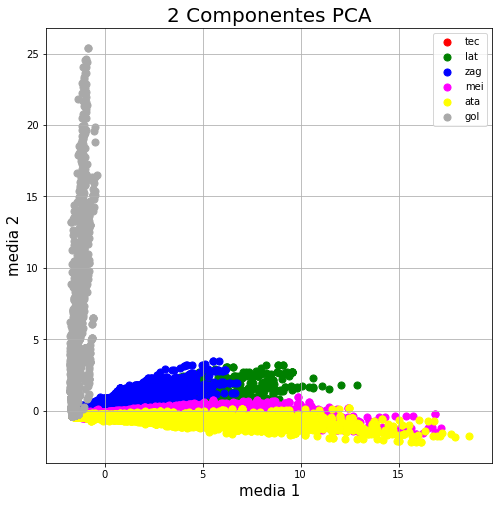

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('media 1', fontsize = 15)
ax.set_ylabel('media 2', fontsize = 15)
ax.set_title('2 Componentes PCA', fontsize = 20)


targets = ['tec', 'lat', 'zag', 'mei', 'ata', 'gol']
colors = ['r', 'g', 'b','#FF00FF','#FFFF00','#A9A9A9']
for alvo, color in zip(targets,colors):
    indicesToKeep = finalDf['posicao_id'] == alvo
    ax.scatter(finalDf.loc[indicesToKeep, 'media 1']
               , finalDf.loc[indicesToKeep, 'media 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [46]:
pca.explained_variance_ratio_

array([0.39268711, 0.14966021, 0.09054056])

Contudo demonsta que os melhores a serem investidos, são sempre goleiros com melhores resultados (pontos) nas partidas